# Parte 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

#Suprimir mensajes de alertas de cambios futuros
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

%matplotlib inline

In [ ]:
#En una celda concentramos todas las operaciones
#Sobre las transformaciones del dataframe original
# Preparando el dataframe df_meteo


url='https://raw.githubusercontent.com/Jen-Ocana/Fisica-Computacional-1/master/Actividad%203/8352.txt'
my_cols=['Fecha','Precip','Evap','Tmax','Tmin']
df_orig=pd.read_csv(url,names=my_cols,encoding='cp1251',sep='\s+',
                    header=None,skiprows=19,skipfooter=1,engine='python')
#definimos un data frame con los nombres de las columnas, el archivo tiene codigos ACII extendido que es el español, asi que se lo indicamos con encoding
#Se brincara los primeros 19 reglones que no tienen info y le ultimo sin encabezado
df_work0=df_orig.copy()
#Cambiamos los espacios en blanco por 'nulo' 
str_Nulo='Nulo'
df_work1=df_work0.replace(to_replace=str_Nulo,value='',regex=True)
#Convertimos los valores de las variables ambientales a num. flotantes
cols_list=['Precip','Evap','Tmax','Tmin']
for cols in cols_list:
  df_work1[cols]=pd.to_numeric(df_work1[cols],errors='coerce')
#la copia por si es necesario
df_work2=df_work1.copy()
#El primer dato es el dia
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'],dayfirst=True).copy()
#Dos columnas adicionales, una de año y otra de mes
#Usamos la funcion .dt.year y .dt.month para extraerlos de la fecha
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año']=df_work2['Fecha'].dt.year
df_work2['Mes']=df_work2['Fecha'].dt.strftime('%b')
##Para esta actividad definimos un nuevo dataframe para el analisis
#Para nuevo punto de partida
df_meteo = df_work2.copy()

##ELIMINEMOS LA COLUMNA DE MES NUMERICO
df_meteo.drop('Mes',axis=1,inplace=True)
df_meteo['Mes']=df_meteo['Fecha'].dt.strftime('%b')

df_meteo_ts = df_meteo.copy()
df_meteo_ts = df_meteo_ts.set_index('Fecha')

df_meteo_ts.info()

##Seleccionamos un conjunto de año de los 27 años crando las colecciones de datos
df_90 = df_meteo_ts[(df_meteo_ts['Año']>=1980)&(df_meteo_ts['Año']<=1990)]
df_00 = df_meteo_ts[(df_meteo_ts['Año']>=1990)&(df_meteo_ts['Año']<=2020)]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7907 entries, 1983-07-01 to 2007-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  7783 non-null   float64
 1   Evap    0 non-null      float64
 2   Tmax    7815 non-null   float64
 3   Tmin    7819 non-null   float64
 4   Año     7907 non-null   int64  
 5   Mes     7907 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 432.4+ KB


In [ ]:
#Funcion para probar la estacionaridad de una serie de tiempo

def test_stationarity (df_ts):

  #determinar la estadistica de promedios moviles
  rolmean = df_ts.rolling(window=365,center=True,min_periods=1).mean()
  rolstd = df_ts.rolling(window=365,center=True,min_periods=1).std()

  #Define el tamaño de la figura
  plt.rcParams["figure.figsize"]=(12,6)

  #Graficar la estadistica de promedios moviles
  plt.plot(df_ts,color="blue",label='Original')
  plt.plot(rolmean,color="red",label='Rolling mean')
  plt.plot(rolstd,color='black',label='Rolling Std Deviation')

  plt.legend(loc='best')
  plt.title('Promedio movil y desviacion estandar')
  plt.grid()
  plt.show()

  #Realizando la prubea aumentada de dickey fuller
  print('Los resultados de la prueba de Dickey-Fuller: ')
  dftest = adfuller(df_ts,autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test Stadistic','p-Value',
                                          '#Lags used',
                                          'Number of observations used'])
  
  for key, value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key]=value
  print(dfoutput)

In [ ]:
#Creamos la primer serie de tiempo a analizar
#Haciendo una copia de la epoca de 1990 a 2007 que tenemos
#O el periodo que se desee. Podemos regresar a este punto 
#La veces que se requiera definir 

#Fechas de inicio y fin, para filtrar la informacion 
start, end ='1991-12','1997-12'

ts_90 = df_meteo_ts.loc[start:end].copy()


ts_max = ts_90['Tmax'].copy()
ts_min = ts_90['Tmin'].copy()

## Tmax

In [ ]:
#Definimos la serie de tiempo con Tmax que vamos a estudiar
#le damos un nombre generico 
ts_test_max = ts_90['Tmax'].copy()

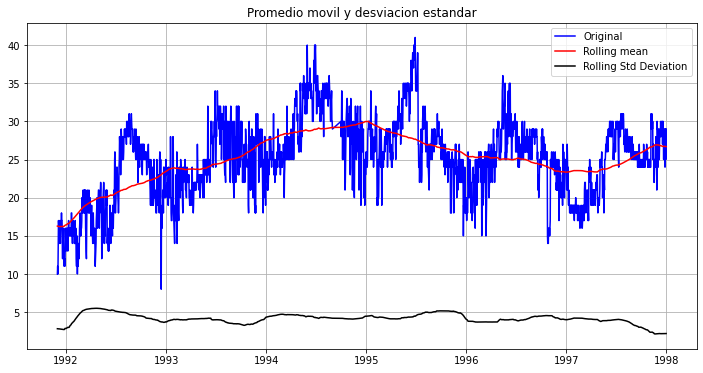

Los resultados de la prueba de Dickey-Fuller: 
Test Stadistic                   -3.580339
p-Value                           0.006148
#Lags used                       14.000000
Number of observations used    2178.000000
Critical Value(1%)               -3.433356
Critical Value(5%)               -2.862868
Critical Value(10%)              -2.567477
dtype: float64


In [ ]:
#Realizamos la prueba de estacionaridad de Tmax
test_stationarity(ts_test_max)

## Tmin

In [ ]:
#Definimos la serie de tiempo con Tmim que vamos a estudiar
#le damos un nombre generico 
ts_test_min = ts_90['Tmin'].copy()

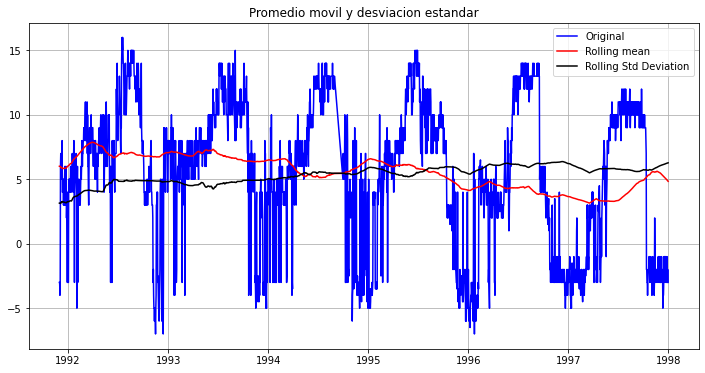

Los resultados de la prueba de Dickey-Fuller: 
Test Stadistic                   -3.058996
p-Value                           0.029740
#Lags used                       20.000000
Number of observations used    2172.000000
Critical Value(1%)               -3.433364
Critical Value(5%)               -2.862872
Critical Value(10%)              -2.567479
dtype: float64


In [ ]:
#Realizamos la prueba de estacionaridad de Tmin
test_stationarity(ts_test_min)

# Parte 2

## Tmax


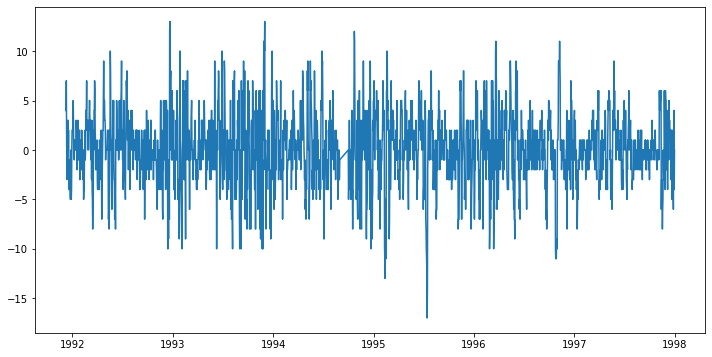

In [ ]:
# Diferenciamos usando la función df.shift()
ts_test_max_diff = ts_test_max - ts_test_max.shift(periods=7)
plt.plot(ts_test_max_diff);

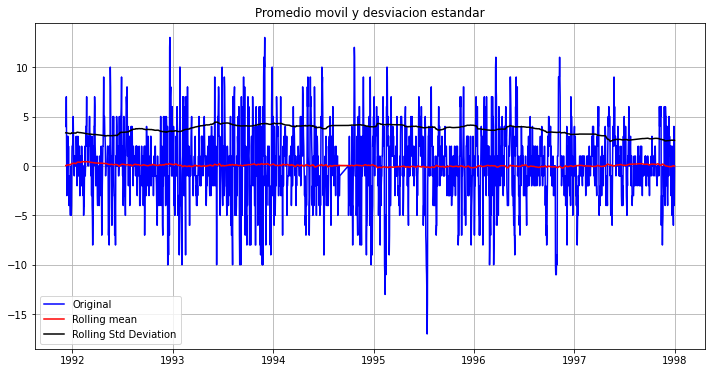

Los resultados de la prueba de Dickey-Fuller: 
Test Stadistic                -1.153289e+01
p-Value                        3.794040e-21
#Lags used                     2.500000e+01
Number of observations used    2.160000e+03
Critical Value(1%)            -3.433381e+00
Critical Value(5%)            -2.862879e+00
Critical Value(10%)           -2.567483e+00
dtype: float64


2186

In [ ]:
# Probamos la estacionaridad
ts_test_max_diff.dropna(inplace=True)
test_stationarity(ts_test_max_diff)
len(ts_test_max_diff)

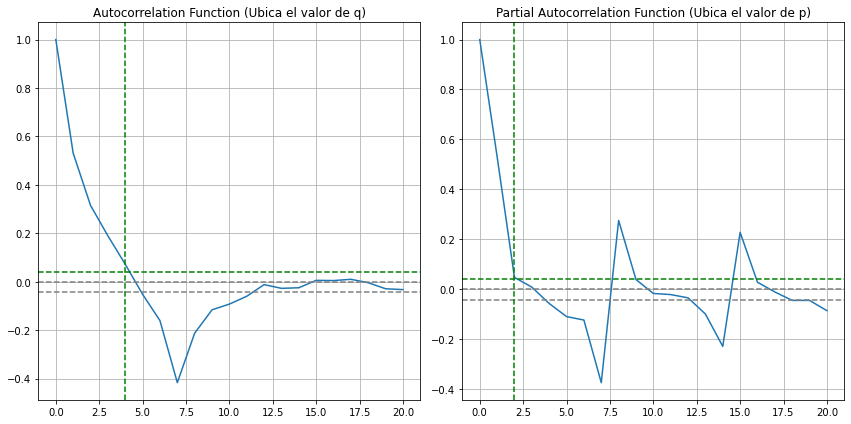

In [ ]:
#Aplicando ARIMA

lag_acf = acf(ts_test_max_diff,nlags=20)
lag_pacf = pacf(ts_test_max_diff,nlags=20,method = 'ols')

#Tamaño de graficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_max_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_max_diff)), linestyle='--', color='green')

#Lineas verde de referencia
plt.axvline(x=4, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_max_diff)),
            linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_max_diff)),
            linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

q=4 p=2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 2192
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4998.155
Method:                       css-mle   S.D. of innovations              2.366
Date:                Sat, 20 Feb 2021   AIC                          10004.309
Time:                        06:50:36   BIC                          10027.079
Sample:                             1   HQIC                         10012.631
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0082      0.033      0.247      0.805      -0.057       0.073
ar.L1.D.Tmax    -0.3215      0.021    -15.362      0.000      -0.363      -0.280
ar.L2.D.Tmax    -0.2009      0.021     -9.59

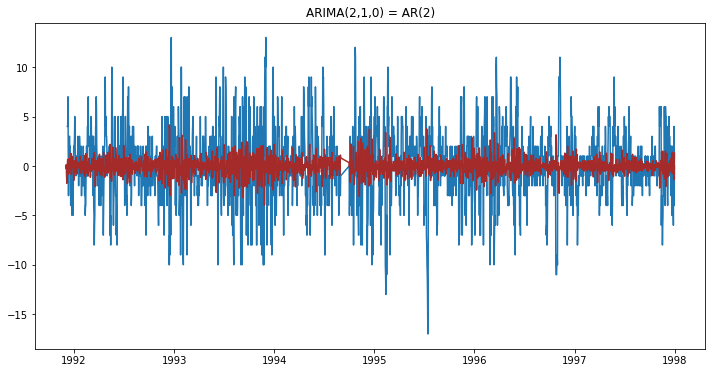

In [ ]:
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_test_max, order=(2,1,0), missing='drop')
results_AR = model.fit(displ=-1)
plt.plot(ts_test_max_diff)
plt.plot(results_AR.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR.summary())

In [ ]:
AR='AR: AIC =10004.309'

Modelo del promedio movil


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 2192
Model:                 ARIMA(0, 1, 4)   Log Likelihood               -4920.900
Method:                       css-mle   S.D. of innovations              2.284
Date:                Sat, 20 Feb 2021   AIC                           9853.800
Time:                        06:50:37   BIC                           9887.956
Sample:                             1   HQIC                          9866.283
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0067      0.012      0.559      0.576      -0.017       0.030
ma.L1.D.Tmax    -0.4188      0.021    -19.603      0.000      -0.461      -0.377
ma.L2.D.Tmax    -0.1802      0.023     -7.91

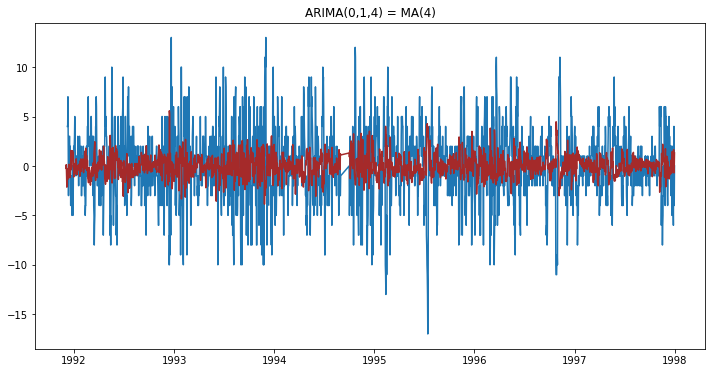

In [ ]:
# Modelo MA(q): (p,d,q) = (0,1,4) 
model = ARIMA(ts_test_max, order=(0,1,4), missing='drop')
results_MA = model.fit(displ=-1)
plt.plot(ts_test_max_diff)
plt.plot(results_MA.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA.summary())

In [ ]:
MA='MA: AIC= 9853.800'

Aplicamos ARIMA(auto-regresion+prom movil)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmax   No. Observations:                 2192
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -4915.405
Method:                       css-mle   S.D. of innovations              2.278
Date:                Sat, 20 Feb 2021   AIC                           9846.811
Time:                        06:50:39   BIC                           9892.351
Sample:                             1   HQIC                          9863.455
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0066      0.010      0.649      0.516      -0.013       0.026
ar.L1.D.Tmax    -0.1533      0.227     -0.675      0.500      -0.599       0.292
ar.L2.D.Tmax     0.5485      0.145      3.79

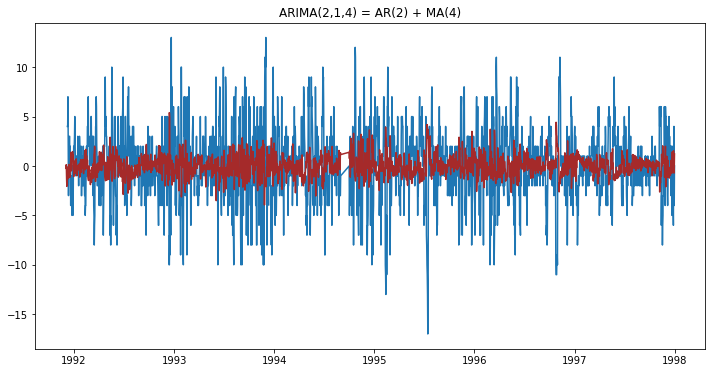

In [ ]:
# Modelo ARIMA(p): (p,d,q) = (2,1,4) 
model = ARIMA(ts_test_max, order=(2,1,4), missing='drop')
results_ARIMA = model.fit(displ=-1)
plt.plot(ts_test_max_diff)
plt.plot(results_ARIMA.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA.summary())

In [ ]:
ARIMA='ARIMA: AIC 9846.811'
print(AR)
print(MA)
print(ARIMA)

AR: AIC =10004.309
MA: AIC= 9853.800
ARIMA: AIC 9846.811


In [ ]:
print('ARIMA(2,1,4): ARIMA tiene el AIC mas pequeño 9846.811')


ARIMA(2,1,4): ARIMA tiene el AIC mas pequeño 9846.811


In [ ]:
# Definimos una serie de tiempo con las predicciones obtenidas por el método ARIMA
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)
# Le sumamos las predicciones de ARIMA a la serie observada (ts_test_max)
predictions_ARIMA = pd.Series(ts_test_max, index = ts_test_max.index)
predictions_ARIMA = predictions_ARIMA.add(predictions_ARIMA_diff)
print(predictions_ARIMA.head())
print(predictions_ARIMA.tail())

Fecha
1991-12-02    0.006587
1991-12-03   -0.257589
1991-12-04    0.132851
1991-12-05   -1.280006
1991-12-06   -2.067050
                ...   
1997-12-27    1.425140
1997-12-28    1.536483
1997-12-29   -0.724622
1997-12-30   -0.647707
1997-12-31    1.219009
Length: 2192, dtype: float64
Fecha
1991-12-01          NaN
1991-12-02    11.006587
1991-12-03     9.742411
1991-12-04    14.132851
1991-12-05    15.719994
dtype: float64
Fecha
1997-12-27    25.425140
1997-12-28    30.536483
1997-12-29    28.275378
1997-12-30    24.352293
1997-12-31    30.219009
dtype: float64


El error de la Raiz Cuadrada de la Media es: 1.0440029998293066


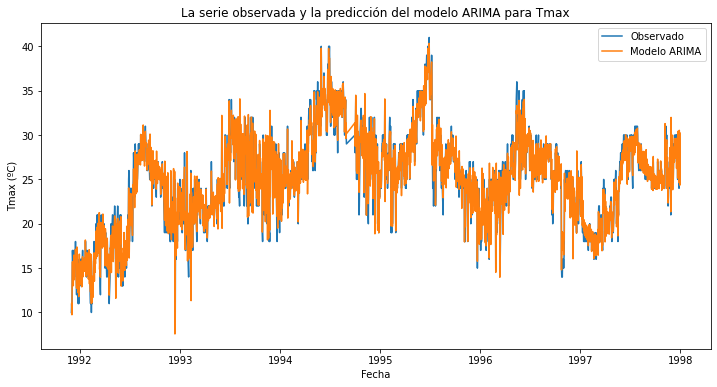

In [ ]:
# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test_max, label='Observado');
plt.plot(predictions_ARIMA, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Tmax (ºC)')
plt.title('La serie observada y la predicción del modelo ARIMA para Tmax')
plt.legend(loc='best');

# Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)

RMSE = np.sqrt(np.mean((predictions_ARIMA - ts_max)**2))
print('El error de la Raiz Cuadrada de la Media es:', RMSE)

## Tmin


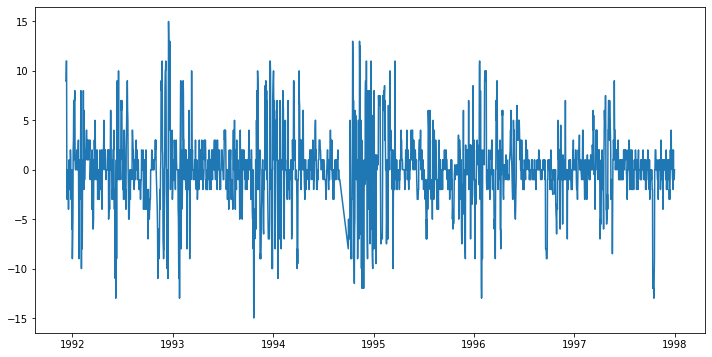

In [ ]:
# Diferenciamos usando la función df.shift()
ts_test_min_diff = ts_test_min - ts_test_min.shift(periods=7)
plt.plot(ts_test_min_diff);

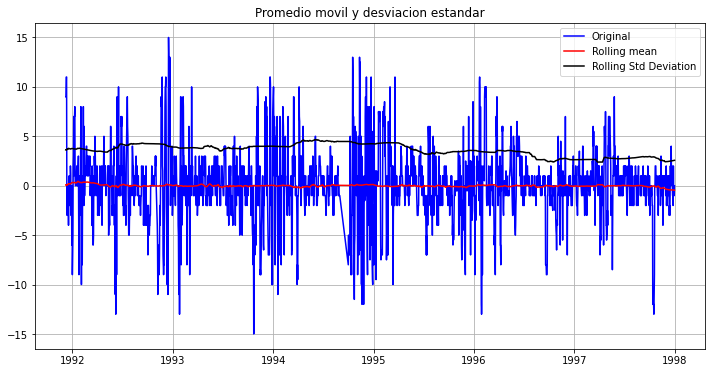

Los resultados de la prueba de Dickey-Fuller: 
Test Stadistic                -9.729446e+00
p-Value                        9.087045e-17
#Lags used                     2.200000e+01
Number of observations used    2.163000e+03
Critical Value(1%)            -3.433377e+00
Critical Value(5%)            -2.862877e+00
Critical Value(10%)           -2.567482e+00
dtype: float64


2186

In [ ]:
# Probamos la estacionaridad
ts_test_min_diff.dropna(inplace=True)
test_stationarity(ts_test_min_diff)
len(ts_test_min_diff)

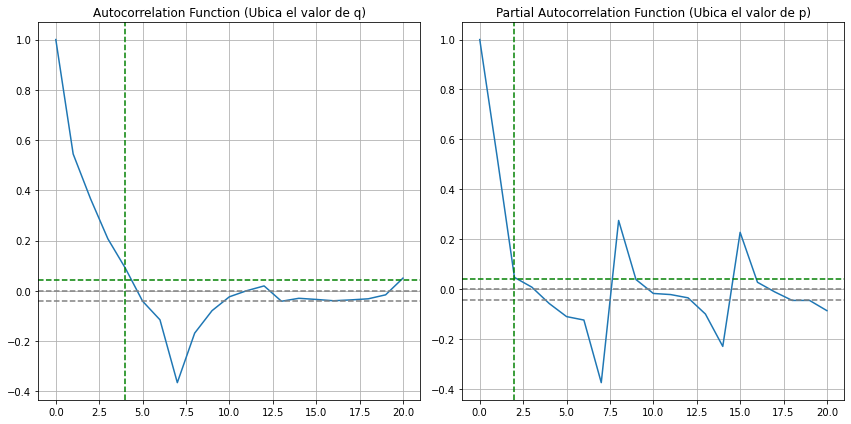

In [ ]:
#Aplicando ARIMA

lag_acf = acf(ts_test_min_diff,nlags=20)
lag_pacf = pacf(ts_test_max_diff,nlags=20,method = 'ols')

#Tamaño de graficas
plt.rcParams["figure.figsize"] = (12,6)

# Gráfica de ACF (Autocorrelation Function)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_min_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_min_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias
#plt.axvline(x=3, linestyle='--', color='green')
plt.axvline(x=4, linestyle='--', color='green')
plt.grid()
plt.title('Autocorrelation Function (Ubica el valor de q)')

# Gráfica de PACF (Partial Autocorrelation Function)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_test_min_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_test_min_diff)), linestyle='--', color='green')
# Graficamos unas líneas verticales como referencias 
plt.axvline(x=2, linestyle='--', color='green')
plt.grid()
plt.title('Partial Autocorrelation Function (Ubica el valor de p)')

plt.tight_layout()

q=4 p=2

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 2192
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -4953.110
Method:                       css-mle   S.D. of innovations              2.318
Date:                Sat, 20 Feb 2021   AIC                           9914.220
Time:                        06:53:07   BIC                           9936.990
Sample:                             1   HQIC                          9922.542
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.033      0.006      0.995      -0.064       0.064
ar.L1.D.Tmin    -0.3641      0.021    -17.267      0.000      -0.405      -0.323
ar.L2.D.Tmin    -0.1585      0.021     -7.51

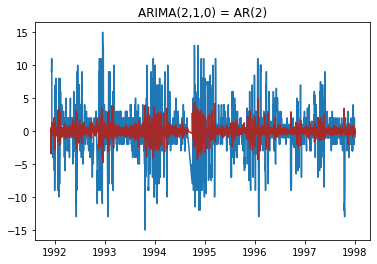

In [ ]:
# Modelo AR(p): (p,d,q) = (2,1,0) 
model = ARIMA(ts_test_min, order=(2,1,0), missing='drop')
results_AR_m= model.fit(displ=-1)
plt.plot(ts_test_min_diff)
plt.plot(results_AR_m.fittedvalues, color='brown')
plt.title('ARIMA(2,1,0) = AR(2)')
print(results_AR_m.summary())

In [ ]:
AR_m='AR: 9914.220'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 2192
Model:                 ARIMA(0, 1, 4)   Log Likelihood               -4895.651
Method:                       css-mle   S.D. of innovations              2.258
Date:                Sat, 20 Feb 2021   AIC                           9803.302
Time:                        06:52:51   BIC                           9837.457
Sample:                             1   HQIC                          9815.785
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0012      0.016     -0.074      0.941      -0.032       0.029
ma.L1.D.Tmin    -0.4349      0.021    -20.421      0.000      -0.477      -0.393
ma.L2.D.Tmin    -0.0951      0.023     -4.13

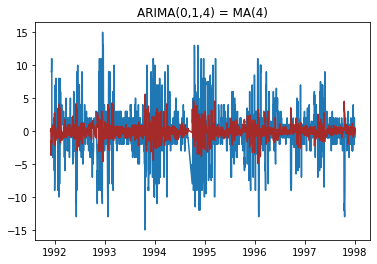

In [ ]:
# Modelo MA(q): (p,d,q) = (0,1,4) 
model = ARIMA(ts_test_min, order=(0,1,4), missing='drop')
results_MA_m = model.fit(displ=-1)
plt.plot(ts_test_min_diff)
plt.plot(results_MA_m.fittedvalues, color='brown')
plt.title('ARIMA(0,1,4) = MA(4)')
print(results_MA_m.summary())

In [ ]:
MA_m='MA: 9803.302'

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.Tmin   No. Observations:                 2192
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -4892.284
Method:                       css-mle   S.D. of innovations              2.254
Date:                Sat, 20 Feb 2021   AIC                           9800.567
Time:                        06:53:52   BIC                           9846.108
Sample:                             1   HQIC                          9817.211
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0013      0.014     -0.091      0.928      -0.030       0.027
ar.L1.D.Tmin    -0.3885      0.102     -3.819      0.000      -0.588      -0.189
ar.L2.D.Tmin     0.5495      0.090      6.10

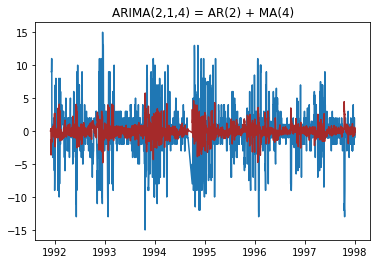

In [ ]:
# Modelo ARIMA(p): (p,d,q) = (2,1,4) 
model = ARIMA(ts_test_min, order=(2,1,4), missing='drop')
results_ARIMA_m = model.fit(displ=-1)
plt.plot(ts_test_min_diff)
plt.plot(results_ARIMA_m.fittedvalues, color='brown')
plt.title('ARIMA(2,1,4) = AR(2) + MA(4)')
print(results_ARIMA_m.summary())

In [ ]:
ARIMA_m='ARIMA: 9800.567'
print(AR_m)
print(MA_m)
print(ARIMA_m)

AR: 9914.220
MA: 9803.302
ARIMA: 9800.567


In [ ]:
print('ARIMA(2,1,4): ARIMA = 9800.567 <- Es el menor AIC')

In [ ]:
# Definimos una serie de tiempo con las predicciones obtenidas por el método ARIMA
predictions_ARIMA_m_diff = pd.Series(results_ARIMA_m.fittedvalues, copy=True)
print(predictions_ARIMA_m_diff)
# Le sumamos las predicciones de ARIMA a la serie observada (ts_test_min)
predictions_ARIMA_m = pd.Series(ts_test_min, index = ts_test_min.index)
predictions_ARIMA_m = predictions_ARIMA_m.add(predictions_ARIMA_m_diff)
print(predictions_ARIMA_m.head())
print(predictions_ARIMA_m.tail())

Fecha
1991-12-02   -0.001309
1991-12-03   -0.001721
1991-12-04    0.361379
1991-12-05   -0.183300
1991-12-06   -3.630967
                ...   
1997-12-27    0.432176
1997-12-28   -0.634521
1997-12-29    0.560579
1997-12-30   -0.211707
1997-12-31    0.006212
Length: 2192, dtype: float64
Fecha
1991-12-01         NaN
1991-12-02   -3.001309
1991-12-03   -4.001721
1991-12-04   -2.638621
1991-12-05    5.816700
dtype: float64
Fecha
1997-12-27   -0.567824
1997-12-28   -3.634521
1997-12-29   -1.439421
1997-12-30   -2.211707
1997-12-31   -2.993788
dtype: float64


El error de la Raiz Cuadrada de la Media es: 1.0171008064872726


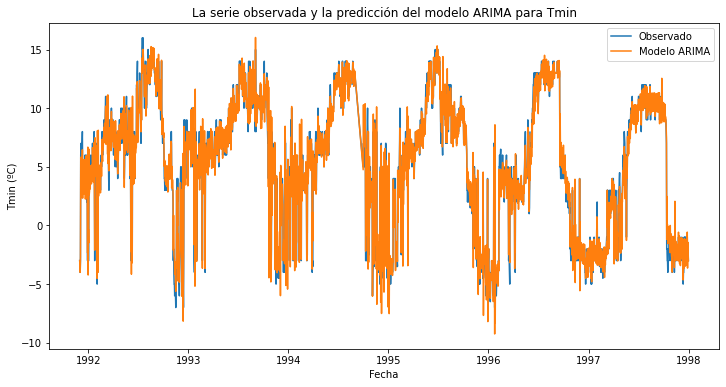

In [ ]:
# Graficamos la serie original y las predicciones con ARIMA

# Tamaño de las gráficas
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(ts_test_min, label='Observado');
plt.plot(predictions_ARIMA_m, label='Modelo ARIMA');
plt.xlabel('Fecha')
plt.ylabel('Tmin (ºC)')
plt.title('La serie observada y la predicción del modelo ARIMA para Tmin')
plt.legend(loc='best');

# Calculamos el RMSE (Root Mean Square Error - Error de la Raiz Cuadrada de la Media)

RMSE_m = np.sqrt(np.mean((predictions_ARIMA_m - ts_min)**2))
print('El error de la Raiz Cuadrada de la Media es:', RMSE_m)